In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
import statsmodels.api as sm
from joypy import joyplot
from statsmodels.regression.rolling import RollingOLS

seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('bmh')


In [60]:
# Define the start date as a string in 'YYYY-MM-DD' format
start = '1990-12-31'

# Define the end date as a string in 'YYYY-MM-DD' format
end = '2023-07-20'

# Specify the date format
date_format = '%Y-%m-%d'

In [61]:


five_factor = (
    web.DataReader('Emerging_5_Factors', 
                                'famafrench', 
                                start=start)[0]
    .div(100)
)

five_factor

C:\Users\danny\AppData\Local\Temp\ipykernel_19784\2400397910.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  web.DataReader('Emerging_5_Factors',
C:\Users\danny\AppData\Local\Temp\ipykernel_19784\2400397910.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  web.DataReader('Emerging_5_Factors',


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1990-12,0.0014,-0.0097,0.0401,-0.9999,-0.9999,0.0060
1991-01,0.0202,0.0047,-0.0001,-0.9999,-0.9999,0.0052
1991-02,0.1231,-0.0506,0.0550,-0.9999,-0.9999,0.0048
1991-03,0.0236,0.0455,0.0555,-0.9999,-0.9999,0.0044
1991-04,0.0006,0.0005,-0.0326,-0.9999,-0.9999,0.0053
...,...,...,...,...,...,...
2023-04,-0.0073,0.0152,0.0505,-0.0150,0.0332,0.0035
2023-05,-0.0145,0.0072,0.0087,-0.0006,0.0105,0.0036
2023-06,0.0371,0.0006,0.0156,-0.0061,0.0034,0.0040


In [62]:

# Retrieve data from the Fama-French database for Emerging Markets 6 Portfolios
# 'web.DataReader' fetches the data
# 'Emerging_Markets_6_Portfolios_ME_Prior_12_2' is the name of the data series you want
# 'famafrench' specifies the database provider (Fama-French)
# '[0]' accesses the first element of the data, which is usually a DataFrame
# '.div(100)' divides all values in the DataFrame by 100, converting percentages to decimals
# '.sub(five_factor['RF'], axis=0)' subtracts the 'RF' column from the DataFrame

test_factor = (
    web.DataReader('Emerging_Markets_6_Portfolios_ME_Prior_12_2', 'famafrench', start=start)[0]
    .div(100)
    .sub(five_factor['RF'], axis=0)
)


test_factor['Mkt-RF'] = five_factor['Mkt-RF']
#tet_drop(columns=['<= 0', 'C'])
test_factor

C:\Users\danny\AppData\Local\Temp\ipykernel_19784\1238058734.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  web.DataReader('Emerging_Markets_6_Portfolios_ME_Prior_12_2', 'famafrench', start=start)[0]
C:\Users\danny\AppData\Local\Temp\ipykernel_19784\1238058734.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  web.DataReader('Emerging_Markets_6_Portfolios_ME_Prior_12_2', 'famafrench', start=start)[0]
C:\Users\danny\AppData\Local\Temp\ipykernel_19784\1238058734.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  web.DataR

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR,Mkt-RF
Date,,,,,,,
1990-12,0.0176,0.0112,0.0278,0.0306,0.0057,-0.0160,0.0014
1991-01,0.0054,0.0428,0.0087,0.0241,0.0047,0.0091,0.0202
1991-02,0.2053,0.0813,0.0930,0.1536,0.1424,0.0890,0.1231
1991-03,-0.0065,0.0077,0.0036,-0.0136,0.0319,0.0455,0.0236
1991-04,-0.0103,-0.0898,0.0507,-0.0280,0.0185,0.0047,0.0006
...,...,...,...,...,...,...,...
2023-04,0.0021,-0.0002,0.0142,-0.0320,-0.0004,0.0051,-0.0073
2023-05,-0.0142,-0.0060,-0.0024,-0.0237,-0.0053,-0.0237,-0.0145
2023-06,0.0353,0.0334,0.0495,0.0374,0.0325,0.0408,0.0371


In [63]:
test_factor.head()

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR,Mkt-RF
Date,,,,,,,
1990-12,0.0176,0.0112,0.0278,0.0306,0.0057,-0.0160,0.0014
1991-01,0.0054,0.0428,0.0087,0.0241,0.0047,0.0091,0.0202
1991-02,0.2053,0.0813,0.0930,0.1536,0.1424,0.0890,0.1231
1991-03,-0.0065,0.0077,0.0036,-0.0136,0.0319,0.0455,0.0236
1991-04,-0.0103,-0.0898,0.0507,-0.0280,0.0185,0.0047,0.0006


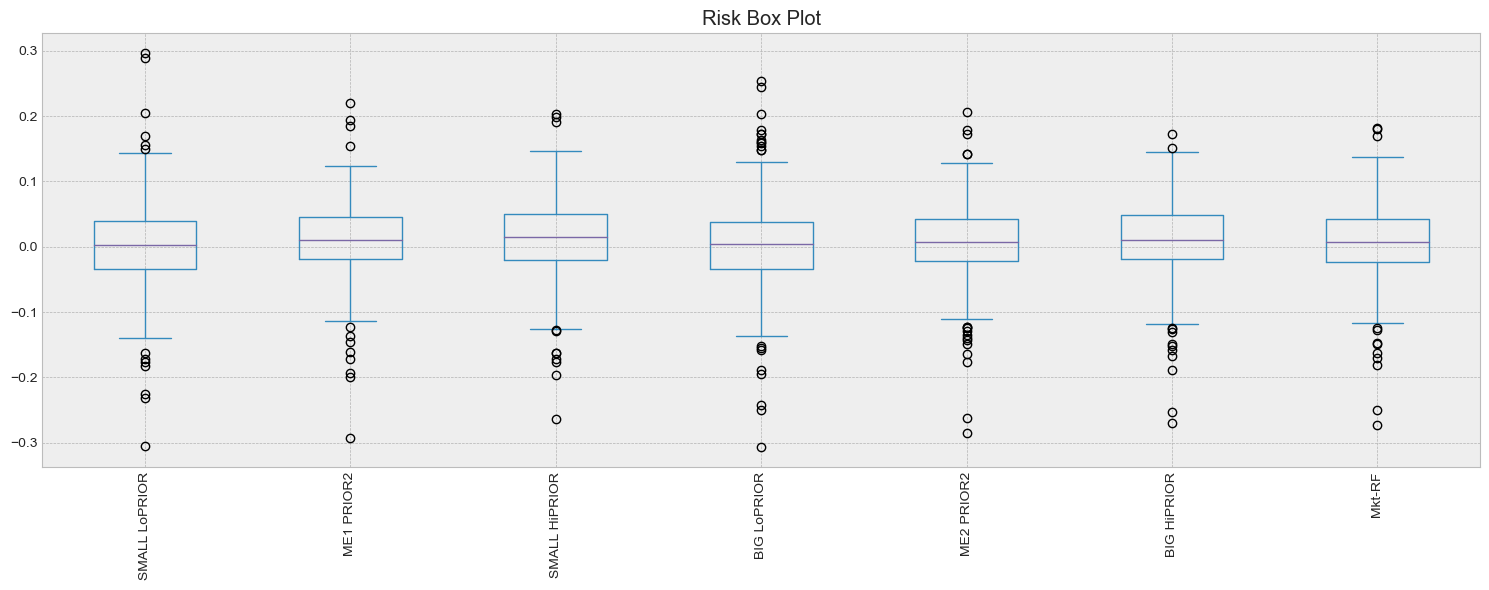

In [64]:
# Plot the 'test_factor' DataFrame using a box plot
# 'kind="box"' specifies the type of plot as a box plot
# 'figsize=(15, 6)' sets the size of the figure to (15, 6) inches
# 'rot=90' rotates the x-axis labels by 90 degrees for better readability
# 'title="Risk Box Plot"' sets the title of the plot

test_factor.plot(kind = "box",figsize = (15,6), rot=90,title = "Risk Box Plot")
plt.tight_layout();
plt.savefig("box.jpg")

Text(0.5, 1.0, 'Six Month Rolling Volatility')

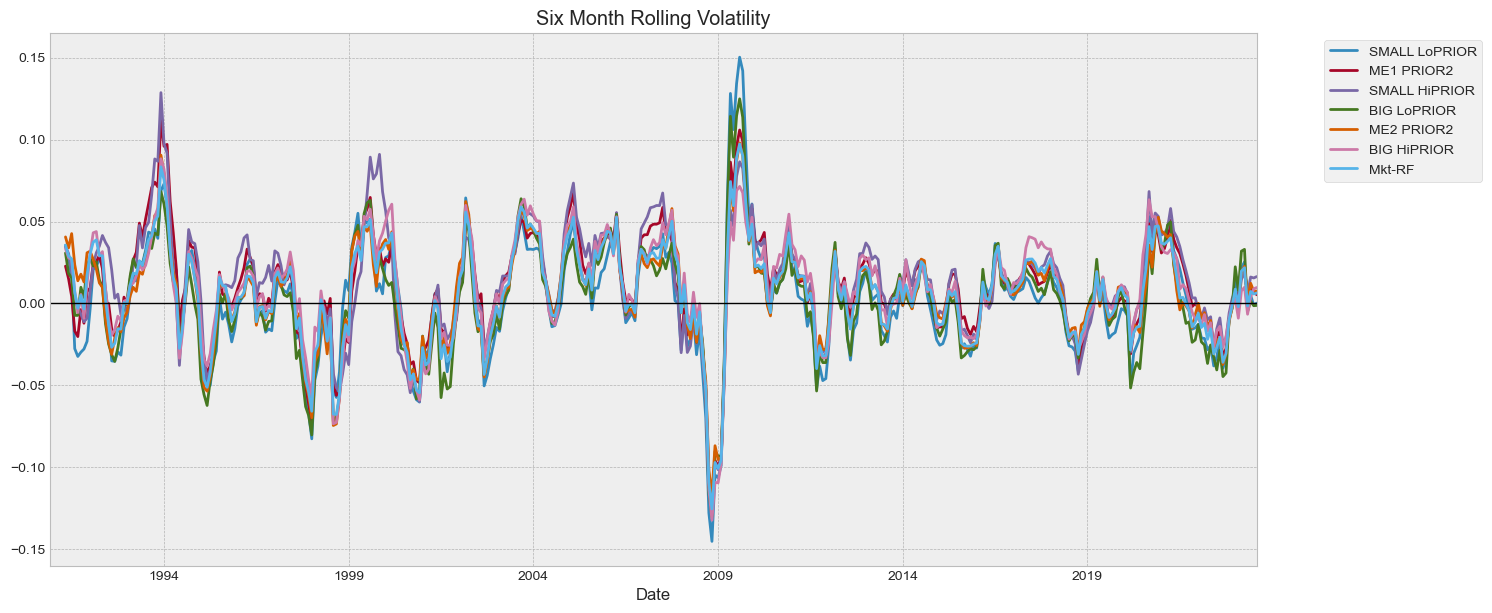

In [65]:
# Calculate a rolling mean of the 'test_factor' DataFrame with a window size of 6
rolling1 = test_factor.rolling(6).mean()
# Create a line plot of the rolling mean with a figure size of (15, 6)
rolling1.plot(figsize=(15, 6))
# Add a legend to the plot, specifying its position
plt.axhline(0, color='black', lw=1)
# Add a legend to the plot, specifying its position
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Adjust the layout to ensure the plot fits within the figure size
plt.tight_layout();
# Set the title of the plot
plt.title('Six Month Rolling Volatility')


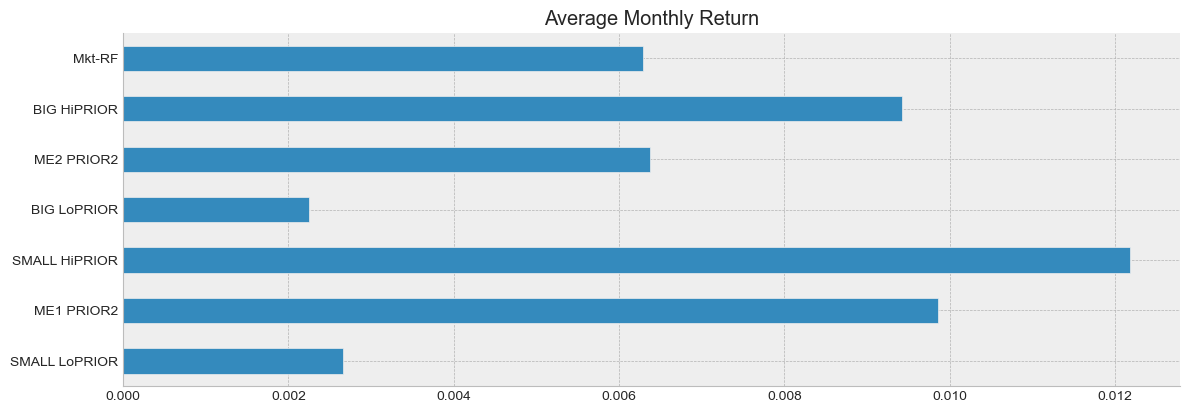

In [66]:
# Calculate the mean of each column in the 'test_factor' DataFrame and create a horizontal bar plot
test_factor.mean().plot.barh(figsize=(12, 4))
# Remove the top and right spines of the plot
sn.despine()
# Adjust the layout to ensure the plot fits within the figure size
plt.tight_layout();
# Set the title of the plot
plt.title('Average Monthly Return')
# Save the plot as an image file named "returnss" with a DPI of 300 and ensure tight bounding box
plt.savefig("returnss",dpi=300, bbox_inches = "tight")
# The code above computes the average monthly return for each column in the 'test_factor' DataFrame
# It then creates a horizontal bar plot, removes the spines, sets the title, and saves the plot as an image file

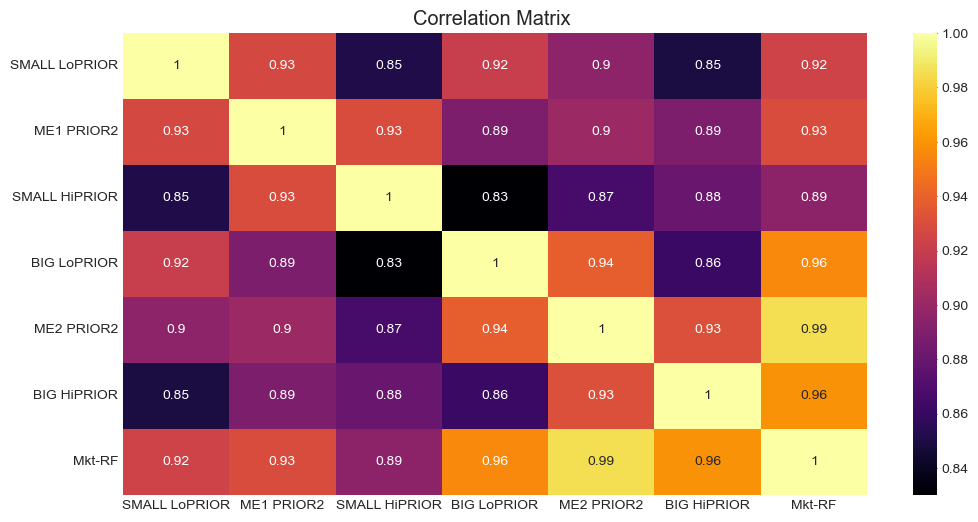

In [67]:
# Create a new DataFrame 'five_factor_df' by dropping the 'RF' column from 'five_factor'
five_factor_df = five_factor.drop(columns=['RF'])
# Generate a heatmap of the correlation matrix for the 'test_factor' DataFrame
# 'cmap='inferno'' sets the colormap for the heatmap to 'inferno'
# 'annot=True' displays the correlation values within the cells
sn.heatmap(test_factor.corr(),cmap='inferno', annot = True)
# Set the title for the heatmap
plt.title('Correlation Matrix ')
# Save the heatmap as an image file named "Correlation" with a DPI of 300 and ensure a tight bounding box
plt.savefig("Correlation",dpi=300, bbox_inches = "tight")
plt.show()

In [68]:
return_data = test_factor

In [69]:
# Calculate the cumulative returns using the 'test_factor' DataFrame
# To calculate cumulative returns, we add 1 to each element of 'test_factor' and then compute the cumulative product
returns = (1+test_factor).cumprod()

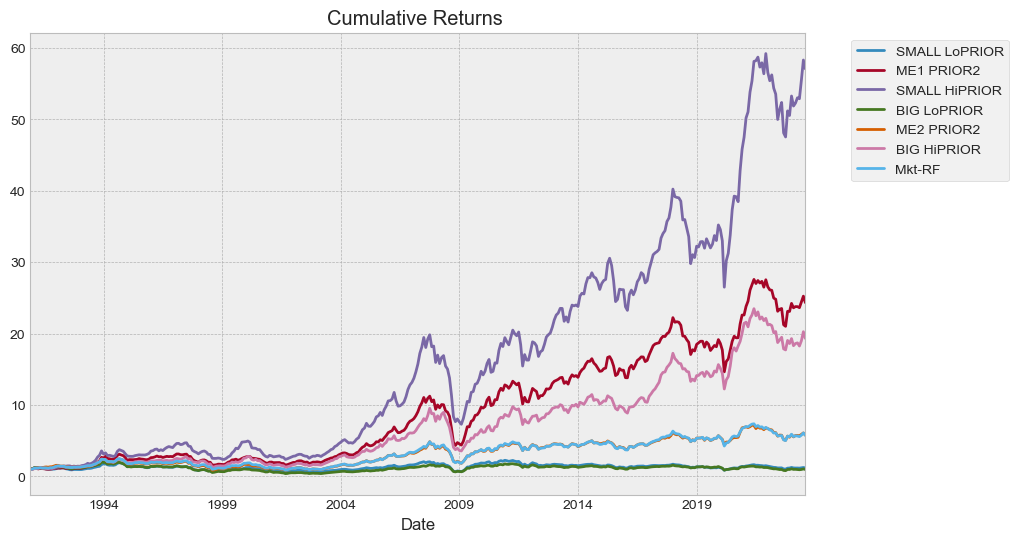

In [70]:
# Create a line plot of the 'returns' DataFrame, showing cumulative returns
# 'figsize=(10, 6)' sets the size of the figure to (10, 6) inches
returns.plot(figsize=(10,6))
# Add a legend to label the plot and specify its position
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Set the title for the plot
plt.title('Cumulative Returns ')
# Save the plot as an image file named "Cumulative_Returns" with a DPI of 300 and ensure a tight bounding box
plt.savefig("Cumulative_Returns",dpi=300, bbox_inches = "tight")

# The code above creates a line plot of cumulative returns, adds a legend, sets the title, and saves the plot as an image.

In [71]:
# Calculate the cumulative maximum values of the 'returns' DataFrame
return_peaks = returns.cummax()
#return_peaks.plot()

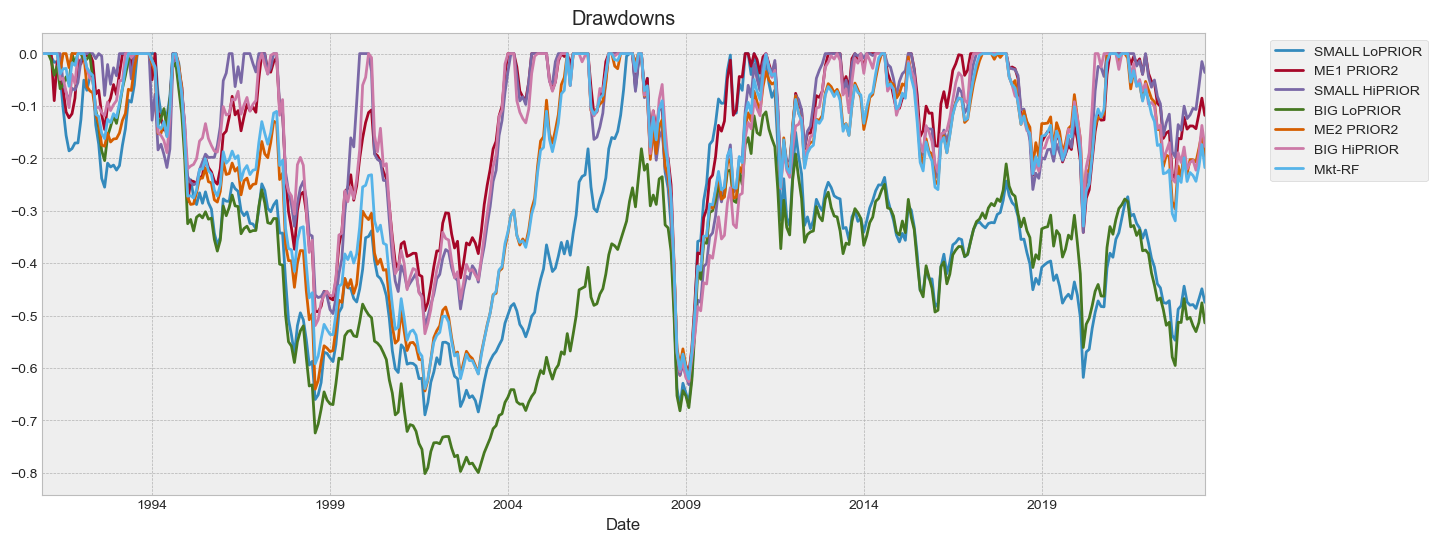

In [72]:

# The code calculates the drawdowns, creates a line plot of the drawdowns, adds a legend, sets the title,
# and saves the plot as an image.

# Calculate the drawdowns by subtracting 'return_peaks' from 'returns' and dividing by 'return_peaks'
return_drawdown = (returns-return_peaks)/return_peaks
# Create a line plot of the drawdowns
# 'figsize=(15, 6)' sets the size of the figure to (15, 6) inches
return_drawdown.plot(figsize=(15,6))
# Set the title for the plot
plt.title('Drawdowns')
# Add a legend to label the plot and specify its position
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Save the plot as an image file named "Drawdowns2" with a DPI of 300 and ensure a tight bounding box
plt.savefig("Drawdowns2",dpi=300, bbox_inches = "tight")


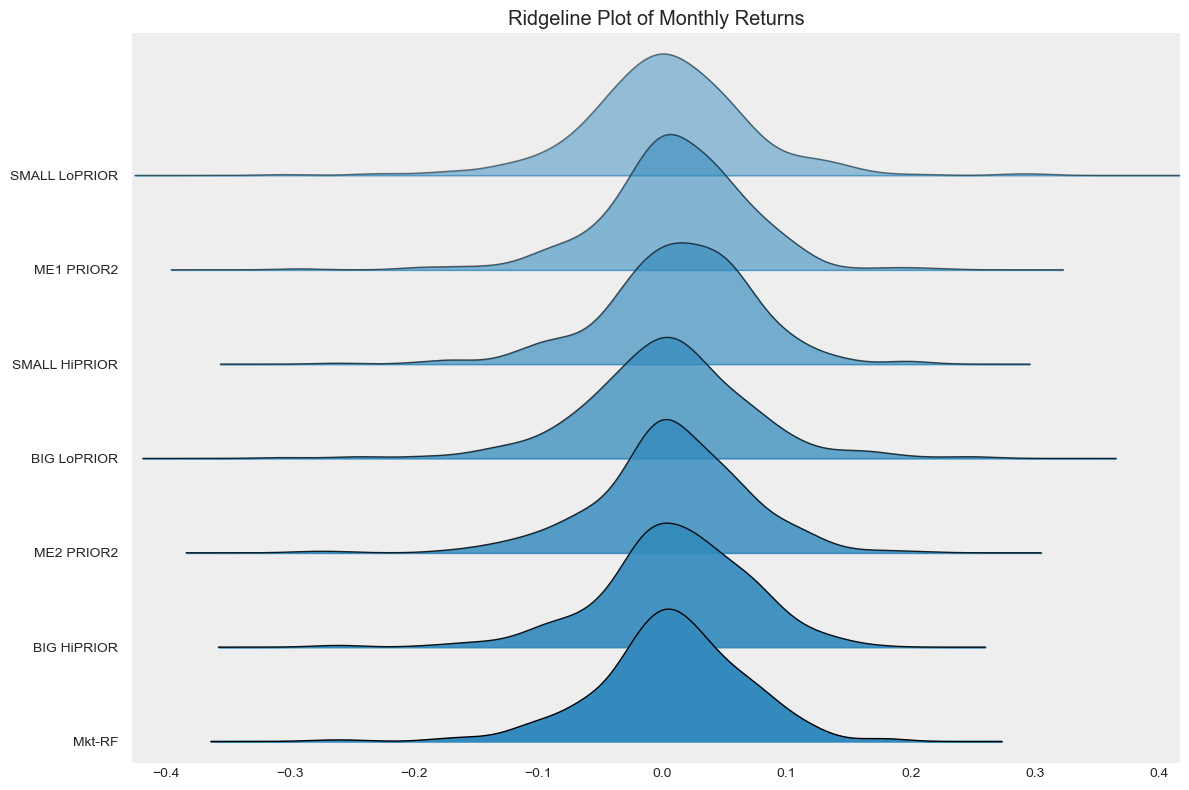

In [73]:
# Create a ridgeline plot of monthly returns using the 'joyplot' function
# 'test_factor' contains the data to be plotted
# 'range_style='own'' specifies that the ranges should be determined independently for each category
# 'linewidth=1' sets the line width for the plot
# 'legend=False' turns off the legend in the plot
# 'fade=True' enables fading (opacity) for the ridgeline areas
# 'figsize=(12, 8)' sets the size of the figure to (12, 8) inches
# 'title="Ridgeline Plot of Monthly Returns"' sets the title for the plot
# 'kind="kde"' specifies the use of kernel density estimation for the ridgeline plot
# 'bins=30' sets the number of bins for the kernel density estimation
# The result will be a ridgeline plot of monthly returns with the specified settings

plt, axes = joyplot(test_factor,range_style='own',
                    linewidth=1, 
                    legend=False, 
                    fade=True,
                    figsize=(12, 8),
                    #colormap=cm.summer_r,
                    title="Ridgeline Plot of Monthly Returns",
                    kind="kde", bins=30)



In [74]:
# Define a risk-free rate
RF = 0.02

# Calculate the annualized mean returns
mean_returns = (test_factor.mean()*12)
# Calculate the annualized cumulative return
cum_return = np.sum(test_factor) * 12
# Calculate the annualized standard deviation
stdv = test_factor.std() * np.sqrt(12)
# Calculate the standard deviation for drawdown (same as overall standard deviation)
stdv_drawdown = test_factor.std() * np.sqrt(12)
# Calculate the Sharpe ratio
sharpe_ratio = (mean_returns) / stdv
# Calculate the maximum drawdown as a percentage
max_drawdown = (test_factor.min())*100
# Calculate the Calmar ratio
calmar_ratio = (mean_returns/max_drawdown)*-100
# Calculate the covariance matrix
cov = test_factor.cov()
# Calculate the variance of the 'Mkt-RF' column from the 'five_factor' DataFrame
var = five_factor['Mkt-RF'].var()
# Calculate the correlation matrix using the Spearman method
correlation = test_factor.corr(method='spearman')
# Calculate beta
beta = (cov / var)

# Calculate the skewness of the returns
skew = return_data.skew()
#alpha = mean_returns - mean_returns['mkt']


In [76]:
# Create a DataFrame 'metrics' to store financial metrics and statistics

metrics = pd.DataFrame({'Sharpe Ratio':sharpe_ratio, 
                           'Annual Returns':mean_returns,
                           'Cumulative Returns':cum_return,
                           'Annual Volatility': stdv,
                           'Skew': skew ,
                           'Max Drawdown': max_drawdown})

# Transpose the 'metrics' DataFrame for a better visualization
metrics.T

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR,Mkt-RF
Sharpe Ratio,0.138690,0.590095,0.701476,0.115336,0.361920,0.541018,0.364687
Annual Returns,0.031875,0.118336,0.146104,0.027050,0.076418,0.113115,0.075508
Cumulative Returns,12.526800,46.506000,57.418800,10.630800,30.032400,44.454000,29.674800
Annual Volatility,0.229828,0.200537,0.208281,0.234534,0.211147,0.209077,0.207050
Skew,-0.024530,-0.561265,-0.511389,-0.199184,-0.532967,-0.666136,-0.570483
Max Drawdown,-30.500000,-29.340000,-26.330000,-30.700000,-28.560000,-26.970000,-27.310000


In [77]:
# Create a DataFrame 'regression_data' to store factors from the Fama-French model and 'test_factor' data
regression_data = pd.DataFrame({'Mkt_RF':five_factor['Mkt-RF'] ,
                          'SMB':five_factor['SMB'] ,
                          'HML':five_factor['HML'] ,
                          'RMW':five_factor['RMW'] ,
                          'CMA':five_factor['CMA'],
                          'Emerging_SMALL_HiPRIOR':test_factor['SMALL HiPRIOR']})

In [78]:
# Perform a linear regression using the 'statsmodels' library
# Define the regression formula, specifying the dependent variable and independent variables
# Create the regression model and fit it to the data
# Print the summary of the regression analysis, which includes various statistical information
# Define the dependent variable ('Emerging_SMALL_HiPRIOR') that we want to predict or explain.
# It's on the left side of the tilde (~) symbol.
# Define the independent variables ('Mkt_RF', 'SMB', 'HML', 'RMW', 'CMA') that are used to predict or explain the dependent variable.
# They are on the right side of the tilde (~) symbol.

regression = smf.ols(
    formula='Emerging_SMALL_HiPRIOR ~ Mkt_RF + SMB + HML + RMW + CMA',
    data=regression_data
).fit()

print(regression.summary())


                              OLS Regression Results                              
Dep. Variable:     Emerging_SMALL_HiPRIOR   R-squared:                       0.900
Model:                                OLS   Adj. R-squared:                  0.899
Method:                     Least Squares   F-statistic:                     699.1
Date:                    Sun, 22 Oct 2023   Prob (F-statistic):          2.95e-191
Time:                            14:57:22   Log-Likelihood:                 1000.8
No. Observations:                     393   AIC:                            -1990.
Df Residuals:                         387   BIC:                            -1966.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [80]:
#import matplotlib.pyplot as plt
#plt.rc('figure', figsize=(12, 6))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
#plt.text(0.01, 0.05, str(regression.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
#plt.axis('off')
#plt.tight_layout()
#plt.savefig('Emerging_SMALL_HiPRIOR2.pdf',dpi=300, bbox_inches = "tight")